In [1]:
%load_ext lab_black

In [2]:
import datetime

import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

sns.set()
sns.set_style("whitegrid")
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)

In [3]:
lake = pd.read_csv("lava_lake_heights.csv", parse_dates=["date"]).sort_values("date")
lake["depth_diff"] = lake.lake_depth_ft.diff()
lake["lake_depth_rolling_avg_ft"] = (
    lake[
        [
            "lake_depth_ft",
        ]
    ]
    .rolling(7, 1, center=True)
    .mean()
)

In [4]:
lake.dtypes

date                         datetime64[ns]
lake_depth_ft                         int64
depth_diff                          float64
lake_depth_rolling_avg_ft           float64
dtype: object

In [5]:
lake.tail()

,date,lake_depth_ft,depth_diff,lake_depth_rolling_avg_ft
4,2021-04-15,745,0.0,742.714286
3,2021-04-16,745,0.0,742.714286
2,2021-04-17,741,-4.0,743.000000
1,2021-04-18,741,0.0,742.600000
0,2021-04-19,741,0.0,742.000000


In [6]:
p = sns.color_palette()
p.as_hex()[3]

'#c44e52'

Text(0.5, 1.0, 'Kīlauea Lava Lake depth')

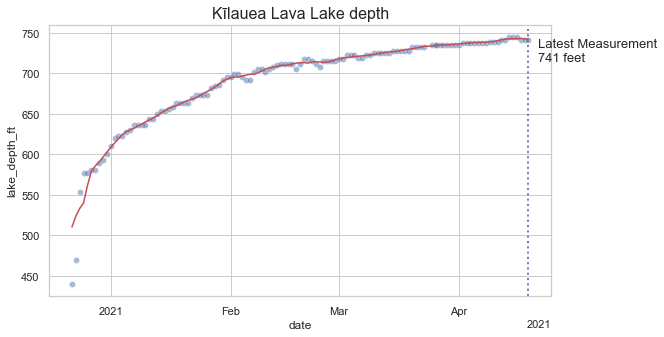

In [7]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

sns.scatterplot(data=lake, x="date", y="lake_depth_ft", ax=ax, alpha=0.5)
sns.lineplot(
    data=lake, x="date", y="lake_depth_rolling_avg_ft", ax=ax, color=p.as_hex()[3]
)
ax.axvline(lake.date.max(), linestyle=":", color=p.as_hex()[4], lw="2")
ax.text(
    lake.date.max() + datetime.timedelta(days=2.5),
    lake.lake_depth_ft.quantile(0.55),
    f"Latest Measurement\n{lake.iloc[-1].lake_depth_ft} feet",
    fontsize=13,
)
ax.set_title("Kīlauea Lava Lake depth", fontsize=16)

In [16]:
fig.savefig("lava_lake_lineplot.png")

<AxesSubplot:xlabel='date', ylabel='depth_diff'>

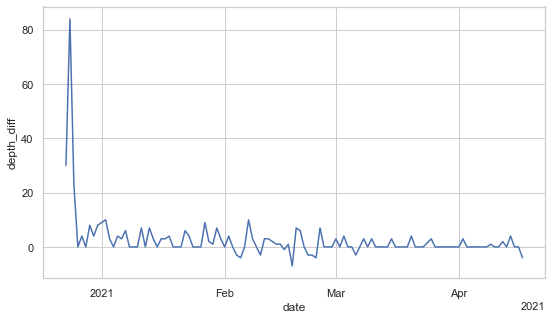

In [17]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

sns.lineplot(data=lake, x="date", y="depth_diff", ax=ax)

## Cone volume with constant flow

In [10]:
from math import pi, tan

def cone_vol(height, theta):
    """
        V = 1/3 * pi * r^2 * h
        r = tan(theta) * h
    """
    return pi * height ** 3 * tan(theta) ** 2 / 3.

def kilauea_cone_vol(height, theta=pi / 4., height_floor=50):
    """
    Truncated cone volume assuming a floor of 50 meters above bottom point of inverted cone
    """
    if height < height_floor:
        raise ValueError("`height` must be greater than 50")
    return cone_vol(height + height_floor, theta) - cone_vol(height_floor, theta)

In [11]:
kilauea_cone_vol(722)

481684324.99811697

\begin{align}
V &= \frac{\pi}{3} * h^3 * \tan^2\theta \\
\Rightarrow h &= \sqrt[3]{\frac{3V}{\pi\tan^2\theta}}
\end{align}

In [12]:
def height_by_volume(volume, theta=pi/45):
    """
    Args:
      volume (float): Assumed volume within cone
      theta (float): Interior angle of cone
    """
    return (3. * volume / (pi * tan(theta) **2)) ** (1. / 3.)

In [13]:
# cubic meters flow per day
FLOW_RATE = 3e4

days = range(1, 75)
heights = [height_by_volume(FLOW_RATE * day_elapsed) for day_elapsed in days]

<AxesSubplot:>

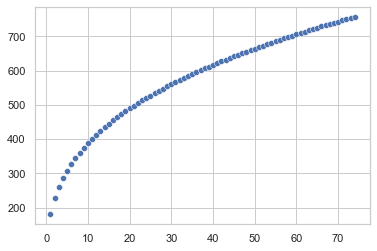

In [14]:
sns.scatterplot(x=days, y=heights)

<AxesSubplot:>

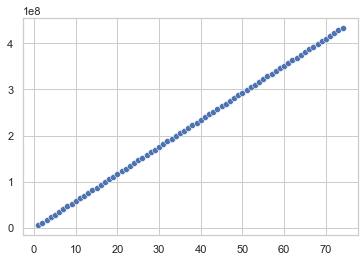

In [15]:
sns.scatterplot(x=days, y=[h**3 for h in heights])

Text(0.5, 1.0, 'Kīlauea Lava Lake depth')

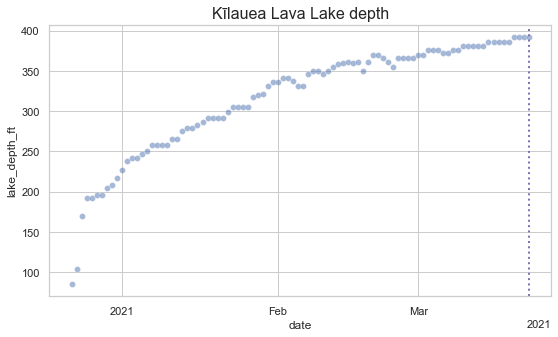

In [16]:
fig, ax = plt.subplots(figsize=(9, 5));
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

sns.scatterplot(x=lake["date"], y=(lake["lake_depth_ft"] / 100.0)**3, ax=ax, alpha=0.5)
ax.axvline(lake.date.max(), linestyle=':', color=p.as_hex()[4], lw="2")
# ax.text(lake.date.max() + datetime.timedelta(days=2.5), lake.lake_depth_ft.quantile(0.55), 'Hi')
ax.set_title("Kīlauea Lava Lake depth", fontsize=16)